# K-water 공모전
> 주제 - 시화호 기후변화

## 필요 library 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install koreanize_matplotlib
import koreanize_matplotlib
import os
import glob
import json
import requests
import geopandas as gpd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.3 MB/s eta 0:00:00


## dataset불러오기, 설명
* 데이터는 깃허브에 올려 두었음

In [2]:
# 시화조력수문데이터
sihwa_sumun_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/Kwater_exportData_2023-07-20.csv', encoding = 'cp949')

In [3]:
sihwa_sumun_df.head()

,번호,일자,호수위(EL.m),해수위(EL.m)
0,364079,2023-07-20 08:40,-1.34,1.82
1,364078,2023-07-20 08:30,-1.38,2.04
2,364077,2023-07-20 08:20,-1.43,2.25
3,364076,2023-07-20 08:10,-1.48,2.49
4,364075,2023-07-20 08:00,-1.54,2.70


In [4]:
# Convert '일자' to datetime format
sihwa_sumun_df['일자'] = pd.to_datetime(sihwa_sumun_df['일자'])

# 2023으로 시작하는 data만 추출
# Extract rows with '일자' starting with '2023'
X = sihwa_sumun_df[sihwa_sumun_df['일자'].dt.year == 2023]

# Display the result
print(X)

           번호                  일자  호수위(EL.m)  해수위(EL.m)
0      364079 2023-07-20 08:40:00      -1.34       1.82
1      364078 2023-07-20 08:30:00      -1.38       2.04
2      364077 2023-07-20 08:20:00      -1.43       2.25
3      364076 2023-07-20 08:10:00      -1.48       2.49
4      364075 2023-07-20 08:00:00      -1.54       2.70
...       ...                 ...        ...        ...
28834  335245 2023-01-01 00:40:00      -1.21       1.60
28835  335244 2023-01-01 00:30:00      -1.27       1.69
28836  335243 2023-01-01 00:20:00      -1.33       1.79
28837  335242 2023-01-01 00:10:00      -1.37       1.84
28838  335241 2023-01-01 00:00:00      -1.43       1.90

[28839 rows x 4 columns]


In [5]:
sihwa_sumun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364079 entries, 0 to 364078
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   번호         364079 non-null  int64         
 1   일자         364079 non-null  datetime64[ns]
 2   호수위(EL.m)  364079 non-null  float64       
 3   해수위(EL.m)  364079 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 11.1 MB


In [6]:
# 안산시 일일 강우량 데이터
ansan_rain_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EC%95%88%EC%82%B0%EC%8B%9C_%EC%9D%BC%EB%B3%84_%EA%B0%95%EC%9A%B0%EB%9F%89_20230112.csv')

In [7]:
ansan_rain_df['날짜'] = pd.to_datetime(ansan_rain_df['날짜'])
ansan_rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38343 entries, 0 to 38342
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시도명     38343 non-null  object        
 1   시군구명    38343 non-null  object        
 2   읍면동     38343 non-null  object        
 3   날짜      38343 non-null  datetime64[ns]
 4   우량(mm)  38343 non-null  float64       
 5   관리기관명   38343 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.8+ MB


In [8]:
ansan_rain_df.head()

,시도명,시군구명,읍면동,날짜,우량(mm),관리기관명
0,안산시,상록구,안산동,2013-07-04,0.0,경기도 안산시청
1,안산시,상록구,안산동,2013-07-05,2.0,경기도 안산시청
2,안산시,상록구,안산동,2013-07-06,0.0,경기도 안산시청
3,안산시,상록구,안산동,2013-07-07,9.0,경기도 안산시청
4,안산시,상록구,안산동,2013-07-08,48.0,경기도 안산시청


In [9]:
ansan_sh_rain_df = ansan_rain_df[ansan_rain_df['읍면동']=='대부남동']
ansan_sh_rain_df = ansan_sh_rain_df.drop(['관리기관명'], axis = 1)

In [10]:
# 안산시 대부남동 강우량 일일 데이터
ansan_sh_rain_df
ansan_sh_rain_df.head()

,시도명,시군구명,읍면동,날짜,우량(mm)
34692,안산시,단원구,대부남동,2013-01-02,0.0
34693,안산시,단원구,대부남동,2013-01-03,0.0
34694,안산시,단원구,대부남동,2013-01-04,0.5
34695,안산시,단원구,대부남동,2013-01-05,0.5
34696,안산시,단원구,대부남동,2013-01-06,0.0


In [11]:
# 기간 확인
ansan_sh_rain_df['날짜']

34692   2013-01-02
34693   2013-01-03
34694   2013-01-04
34695   2013-01-05
34696   2013-01-06
           ...    
38338   2022-12-27
38339   2022-12-28
38340   2022-12-29
38341   2022-12-30
38342   2022-12-31
Name: 날짜, Length: 3651, dtype: datetime64[ns]

In [12]:
ansan_sh_rain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3651 entries, 34692 to 38342
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시도명     3651 non-null   object        
 1   시군구명    3651 non-null   object        
 2   읍면동     3651 non-null   object        
 3   날짜      3651 non-null   datetime64[ns]
 4   우량(mm)  3651 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 171.1+ KB


In [13]:
# 해양환경공단_해양수질자동측정망_시화조력(20211230)
water_quality_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/%ED%95%B4%EC%96%91%ED%99%98%EA%B2%BD%EA%B3%B5%EB%8B%A8_%ED%95%B4%EC%96%91%EC%88%98%EC%A7%88%EC%9E%90%EB%8F%99%EC%B8%A1%EC%A0%95%EB%A7%9D%20%EC%8B%9C%ED%99%94%EC%A1%B0%EB%A0%A5_20211231.csv', encoding = 'cp949')

In [14]:
water_quality_df['관측일자'] = pd.to_datetime(water_quality_df['관측일자'])

In [15]:
water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   정점코드      103713 non-null  int64         
 1   관측일자      103713 non-null  datetime64[ns]
 2   전기전도도     103713 non-null  float64       
 3   수온        103713 non-null  float64       
 4   수소이온농도    103713 non-null  float64       
 5   용존산소량     103713 non-null  float64       
 6   탁도        103713 non-null  int64         
 7   일사량       103713 non-null  float64       
 8   기온        103713 non-null  float64       
 9   상대습도      103713 non-null  int64         
 10  풍속        103713 non-null  int64         
 11  풍향        103713 non-null  int64         
 12  강수량       103713 non-null  float64       
 13  염분        103713 non-null  float64       
 14  클로로필      103713 non-null  float64       
 15  화학적산소요구량  103713 non-null  float64       
 16  총질소       103713 non-null  float64    

In [16]:
water_quality_df.head()

,정점코드,관측일자,전기전도도,수온,수소이온농도,용존산소량,탁도,일사량,기온,상대습도,...,염분,클로로필,화학적산소요구량,총질소,총인,암모니아질소,질산질소,인산성인,규산규소,남조류
0,102,2021-01-01 00:00:00,27.64,3.53,7.82,10.42,5,0.0,-4.37,0,...,32.45,1.25,3.52,0.542,0.041,0.099,0.215,0.035,0,0
1,102,2021-01-01 00:05:00,27.61,3.51,7.82,10.42,6,0.0,-4.37,0,...,32.43,1.17,3.52,0.542,0.041,0.099,0.215,0.035,0,0
2,102,2021-01-01 00:10:00,27.59,3.48,7.82,10.41,7,0.0,-4.45,0,...,32.44,0.57,3.52,0.542,0.041,0.099,0.215,0.035,0,0
3,102,2021-01-01 00:15:00,27.63,3.56,7.82,10.40,7,0.0,-4.40,0,...,32.40,1.16,3.52,0.542,0.041,0.099,0.215,0.035,0,0
4,102,2021-01-01 00:20:00,27.69,3.61,7.82,10.39,7,0.0,-4.54,0,...,32.44,0.88,3.52,0.542,0.041,0.099,0.215,0.035,0,0


In [17]:
## 기온 추출.. 근데 너무 적음

# 날짜별 평균 기온
water_quality_df['날짜'] = pd.to_datetime(water_quality_df['관측일자']).dt.date
water_quality_df['관측시간'] = pd.to_datetime(water_quality_df['관측일자']).dt.time

# 날짜를 기준으로 그룹화하여 temp 열의 평균값 계산
result_q_df = water_quality_df.groupby('날짜')['기온'].mean()

# 결과 출력
print(result_q_df.head())
print(result_q_df.info())

날짜
2021-01-01   -2.276181
2021-01-02   -2.122951
2021-01-03   -2.273056
2021-01-04   -1.880312
2021-01-05   -2.853021
Name: 기온, dtype: float64
<class 'pandas.core.series.Series'>
Index: 364 entries, 2021-01-01 to 2021-12-31
Series name: 기온
Non-Null Count  Dtype  
--------------  -----  
364 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB
None


In [18]:
# 해양환경공단_해양환경정보지도_해양환경측정망(시화)
# https://github.com/haileychoii/k-water_ready/tree/main/%ED%95%B4%EC%96%91%ED%99%98%EA%B2%BD%EA%B3%B5%EB%8B%A8_%ED%95%B4%EC%96%91%ED%99%98%EA%B2%BD%20%EC%A0%95%EB%B3%B4%EC%A7%80%EB%8F%84_%ED%95%B4%EC%96%91%ED%99%98%EA%B2%BD%EC%B8%A1%EC%A0%95%EB%A7%9D(%EC%8B%9C%ED%99%94%ED%98%B8)_20220510

In [19]:
# shp_file_path = 'kwater_dataset\해양환경공단_해양환경 정보지도_해양환경측정망(시화호)_20220510\mei_koem_sta_nemo_cd.shp'
# geo_data_frame = gpd.read_file(shp_file_path)
# print(geo_data_frame)

In [20]:
# 일자별 시화호 댐 수문 방류량, 개문시작시간, 폐문종료시각 데이터
discharge_water_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/%ED%95%9C%EA%B5%AD%EB%86%8D%EC%96%B4%EC%B4%8C%EA%B3%B5%EC%82%AC_%ED%99%94%EC%95%88%EC%82%AC%EC%97%85%EB%8B%A8_20230504.csv', encoding = 'cp949')

In [21]:
discharge_water_df['일자'] = pd.to_datetime(discharge_water_df['일자'])
discharge_water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일자       99 non-null     datetime64[ns]
 1   개문시작시각   99 non-null     object        
 2   폐문종료시각   99 non-null     object        
 3   방류량(천톤)  99 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ KB


In [22]:
discharge_water_df.head()

,일자,개문시작시각,폐문종료시각,방류량(천톤)
0,2018-04-02,22:30,02:22,917.295
1,2018-04-04,12:00,23:09,747.897
2,2018-05-14,20:10,00:10,634.439
3,2018-05-16,21:13,01:22,917.295
4,2018-05-18,22:32,02:44,917.295


In [23]:
# 안산시 단원구 대부동단기예보 데이터
# 단기예보 - 3시간기온, 6시간강수량, 6시간적설, 강수형태, 강수확률, 습도, 일최고&최저기온, 파고, 풍속, 풍향, 하늘상태로 이루어져 있음

In [24]:
# 안산시 단원구 대부동 단기예보(3시간 기온)
h3_1718_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/201707-201806(%EB%8C%80%EB%B6%80%EB%8F%99)/%EB%8C%80%EB%B6%80%EB%8F%99_3%EC%8B%9C%EA%B0%84%EA%B8%B0%EC%98%A8_201707_201806.csv')
h3_1718_df.head()
h3_1718_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54031 entries, 0 to 54030
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0    format: day                              54031 non-null  object 
 1   hour                                      54020 non-null  float64
 2   forecast                                  54020 non-null  float64
 3   value  location:53_120 Start : 20170701   54020 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.6+ MB


In [25]:
h3_1819_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/201807-201906(%EB%8C%80%EB%B6%80%EB%8F%99)/%EB%8C%80%EB%B6%80%EB%8F%99_3%EC%8B%9C%EA%B0%84%EA%B8%B0%EC%98%A8_201807_201906.csv')
h3_1819_df.head()

,format: day,hour,forecast,value location:53_120 Start : 20180701
0,1,0200,+4,22.000000
1,1,0200,+7,23.000000
2,1,0200,+10,22.000000
3,1,0200,+13,22.000000
4,1,0200,+16,22.000000


In [26]:
h3_1920_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/201907-202006(%EB%8C%80%EB%B6%80%EB%8F%99)/%EB%8C%80%EB%B6%80%EB%8F%99_3%EC%8B%9C%EA%B0%84%EA%B8%B0%EC%98%A8_201907_202006.csv')
h3_1920_df.head()

,format: day,hour,forecast,value location:53_120 Start : 20190701
0,1,200.0,4.0,24.0
1,1,200.0,7.0,22.0
2,1,200.0,10.0,20.0
3,1,200.0,13.0,19.0
4,1,200.0,16.0,18.0


In [27]:
h3_2021_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/202007-202106(%EB%8C%80%EB%B6%80%EB%8F%99)/%EB%8C%80%EB%B6%80%EB%8F%99_3%EC%8B%9C%EA%B0%84%EA%B8%B0%EC%98%A8_202007_202106.csv')
h3_2021_df.head()

,format: day,hour,forecast,value location:53_120 Start : 20200701
0,1,200.0,4.0,23.0
1,1,200.0,7.0,22.0
2,1,200.0,10.0,20.0
3,1,200.0,13.0,19.0
4,1,200.0,16.0,19.0


In [28]:
# 3시간 기온 합치기
h3_df = pd.concat([h3_1718_df, h3_1819_df, h3_1920_df, h3_2021_df])
h3_df.head()

,format: day,hour,forecast,value location:53_120 Start : 20170701,value location:53_120 Start : 20180701,value location:53_120 Start : 20190701,value location:53_120 Start : 20200701
0,1,200.0,4.0,24.0,NaN,NaN,NaN
1,1,200.0,7.0,23.0,NaN,NaN,NaN
2,1,200.0,10.0,22.0,NaN,NaN,NaN
3,1,200.0,13.0,22.0,NaN,NaN,NaN
4,1,200.0,16.0,22.0,NaN,NaN,NaN


In [29]:
# 강수량

In [30]:
rain_1718_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/201707-201806(%EB%8C%80%EB%B6%80%EB%8F%99)/%EB%8C%80%EB%B6%80%EB%8F%99_6%EC%8B%9C%EA%B0%84%EA%B0%95%EC%88%98%EB%9F%89_201707_201806.csv')
rain_1718_df.head()

,format: day,hour,forecast,value location:53_120 Start : 20170701
0,1,200.0,7.0,0.0
1,1,200.0,13.0,0.0
2,1,200.0,19.0,10.0
3,1,200.0,25.0,20.0
4,1,200.0,31.0,20.0


In [31]:
rain_1819_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/201807-201906(%EB%8C%80%EB%B6%80%EB%8F%99)/%EB%8C%80%EB%B6%80%EB%8F%99_6%EC%8B%9C%EA%B0%84%EA%B0%95%EC%88%98%EB%9F%89_201807_201906.csv')

In [32]:
rain_1920_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/201907-202006(%EB%8C%80%EB%B6%80%EB%8F%99)/%EB%8C%80%EB%B6%80%EB%8F%99_6%EC%8B%9C%EA%B0%84%EA%B0%95%EC%88%98%EB%9F%89_201907_202006.csv')

In [33]:
rain_2021_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/202007-202106(%EB%8C%80%EB%B6%80%EB%8F%99)/%EB%8C%80%EB%B6%80%EB%8F%99_6%EC%8B%9C%EA%B0%84%EA%B0%95%EC%88%98%EB%9F%89_202007_202106.csv')

In [34]:
# rain_df 합치기
rain_df = pd.concat([rain_1718_df, rain_1819_df, rain_1920_df, rain_2021_df])
rain_df.head()

,format: day,hour,forecast,value location:53_120 Start : 20170701,value location:53_120 Start : 20180701,value location:53_120 Start : 20190701,value location:53_120 Start : 20200701
0,1,200.0,7.0,0.0,NaN,NaN,NaN
1,1,200.0,13.0,0.0,NaN,NaN,NaN
2,1,200.0,19.0,10.0,NaN,NaN,NaN
3,1,200.0,25.0,20.0,NaN,NaN,NaN
4,1,200.0,31.0,20.0,NaN,NaN,NaN


In [35]:
# 일 최고 기

In [36]:
# 우리나라 기후평년값(안산, 2011~2020)
try:
    안산_기후평년값_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/STCS_%EC%9A%B0%EB%A6%AC%EB%82%98%EB%9D%BC%EA%B8%B0%ED%9B%84%ED%8F%89%EB%85%84%EA%B0%92_DD_20230726081117.csv',skiprows = 4, header = 1, encoding = 'cp949')
except pd.errors.ParserError as e:
    print('ParserError:', e)

안산_기후평년값_df.head()

,지점명,일시,최저기온(°C),평균기온(°C),최고기온(°C),강수량(mm),습도(%),일조시간(hr)
0,안산,06-27,17.8,22.4,28.1,8.0,NaN,NaN
1,안산,06-28,18.2,22.6,28.1,10.6,NaN,NaN
2,안산,06-29,18.4,22.7,28.0,11.9,NaN,NaN
3,안산,06-30,18.7,22.9,28.1,14.1,NaN,NaN
4,안산,07-01,18.8,22.9,27.9,17.8,NaN,NaN


In [37]:
# NaN값 제거
안산_기후평년값_df = 안산_기후평년값_df.dropna(axis = 1)
안산_기후평년값_df.drop('지점명', axis = 1,  inplace = True)
안산_기후평년값_df.head()

<ipython-input-37-20bd11efcd59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  안산_기후평년값_df.drop('지점명', axis = 1,  inplace = True)


,일시,최저기온(°C),평균기온(°C),최고기온(°C),강수량(mm)
0,06-27,17.8,22.4,28.1,8.0
1,06-28,18.2,22.6,28.1,10.6
2,06-29,18.4,22.7,28.0,11.9
3,06-30,18.7,22.9,28.1,14.1
4,07-01,18.8,22.9,27.9,17.8


In [38]:
안산_기후평년값_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   일시        30 non-null     object 
 1   최저기온(°C)  30 non-null     float64
 2   평균기온(°C)  30 non-null     float64
 3   최고기온(°C)  30 non-null     float64
 4   강수량(mm)   30 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


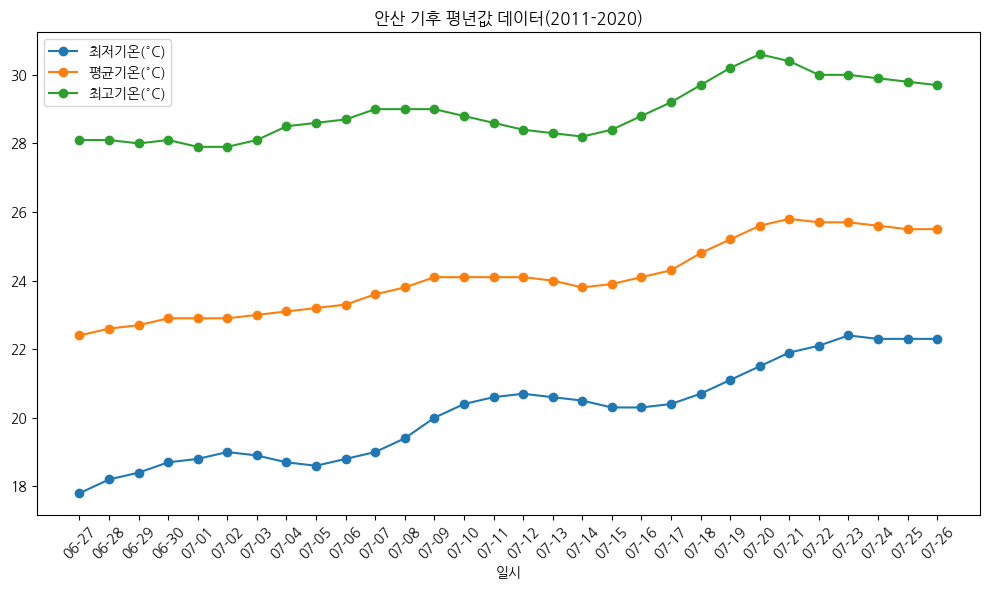

<Figure size 640x480 with 0 Axes>

In [39]:

# Plotting
plt.figure(figsize=(10, 6))

# Plotting temperature data
plt.plot(안산_기후평년값_df['일시'],안산_기후평년값_df['최저기온(°C)'], marker='o', label='최저기온(°C)')
plt.plot(안산_기후평년값_df['일시'], 안산_기후평년값_df['평균기온(°C)'], marker='o', label='평균기온(°C)')
plt.plot(안산_기후평년값_df['일시'], 안산_기후평년값_df['최고기온(°C)'], marker='o', label='최고기온(°C)')

# Set x-axis label and title
plt.xlabel('일시')
plt.title('안산 기후 평년값 데이터(2011-2020)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('안산기온평년값_11-20.png')

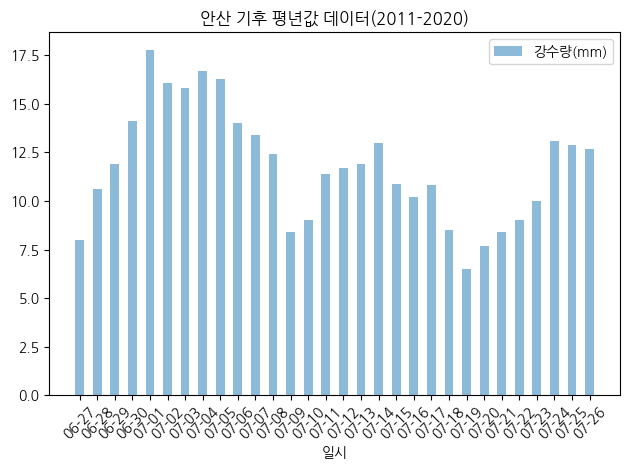

In [40]:
# Plotting rainfall data as a bar plot
plt.bar(안산_기후평년값_df['일시'], 안산_기후평년값_df['강수량(mm)'], width=0.5, align='center', label='강수량(mm)', alpha=0.5)

# Set x-axis label and title
plt.xlabel('일시')
plt.title('안산 기후 평년값 데이터(2011-2020)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend()

plt.savefig('안산강수량평년값_11-20.png')

# Show the plot
plt.tight_layout()
plt.show()

------------------------------------------------------------------------


## data 전처리 - 데이터 합치기
* 방류량(discharge) 데이터는 99개밖에 안되므로 옵션으로 넣기
* 기후 관련/ 기후 + 수질 관련/ 기후 + 수질 + 방류량 관련

In [41]:
# 시화 수문 데이터 기준

In [42]:
# 안산시 대부남동 수문수위정보, 강수량, 기온 등 기후 data 정리
print(ansan_sh_rain_df.head())
print(sihwa_sumun_df.head())

       시도명 시군구명   읍면동         날짜  우량(mm)
34692  안산시  단원구  대부남동 2013-01-02     0.0
34693  안산시  단원구  대부남동 2013-01-03     0.0
34694  안산시  단원구  대부남동 2013-01-04     0.5
34695  안산시  단원구  대부남동 2013-01-05     0.5
34696  안산시  단원구  대부남동 2013-01-06     0.0
       번호                  일자  호수위(EL.m)  해수위(EL.m)
0  364079 2023-07-20 08:40:00      -1.34       1.82
1  364078 2023-07-20 08:30:00      -1.38       2.04
2  364077 2023-07-20 08:20:00      -1.43       2.25
3  364076 2023-07-20 08:10:00      -1.48       2.49
4  364075 2023-07-20 08:00:00      -1.54       2.70


In [43]:
# 일단 두개 합침, 강수량 데이터 기준으로 일자별로 합쳐봄
merged_df = pd.merge(sihwa_sumun_df, ansan_sh_rain_df,left_on='일자', right_on='날짜')
merged_df.head()

,번호,일자,호수위(EL.m),해수위(EL.m),시도명,시군구명,읍면동,날짜,우량(mm)
0,335097,2022-12-31,-1.25,1.60,안산시,단원구,대부남동,2022-12-31,0.0
1,334953,2022-12-30,-1.16,1.04,안산시,단원구,대부남동,2022-12-30,0.0
2,334809,2022-12-29,-1.20,0.10,안산시,단원구,대부남동,2022-12-29,0.0
3,334665,2022-12-28,-1.03,-0.91,안산시,단원구,대부남동,2022-12-28,0.0
4,334521,2022-12-27,-1.76,-2.12,안산시,단원구,대부남동,2022-12-27,0.0


In [44]:
merged_df = merged_df.drop(['날짜', '번호', '시도명', '시군구명', '읍면동'], axis = 1)
# merged_df = merged_df.rename(columns = {'일자':'날짜'})
merged_df.head()

,일자,호수위(EL.m),해수위(EL.m),우량(mm)
0,2022-12-31,-1.25,1.60,0.0
1,2022-12-30,-1.16,1.04,0.0
2,2022-12-29,-1.20,0.10,0.0
3,2022-12-28,-1.03,-0.91,0.0
4,2022-12-27,-1.76,-2.12,0.0


In [45]:
merged_df['일자']

0      2022-12-31
1      2022-12-30
2      2022-12-29
3      2022-12-28
4      2022-12-27
          ...    
2325   2016-07-30
2326   2016-07-29
2327   2016-07-28
2328   2016-07-27
2329   2016-07-26
Name: 일자, Length: 2330, dtype: datetime64[ns]

In [46]:
# 일단 방류량이랑 합침
merged_방류량_df = pd.merge(merged_df, discharge_water_df, left_on='일자', right_on='일자')


In [47]:
merged_방류량_df.head()

,일자,호수위(EL.m),해수위(EL.m),우량(mm),개문시작시각,폐문종료시각,방류량(천톤)
0,2022-09-15,-1.60,-1.97,0.0,11:50,15:01,688.268
1,2022-09-14,-2.59,-3.24,0.0,11:09,14:46,879.969
2,2022-09-13,-3.48,-4.17,0.0,10:36,14:31,1226.070
3,2022-09-08,-2.48,0.99,0.0,07:47,10:32,844.929
4,2022-09-08,-2.48,0.99,0.0,19:35,23:13,1094.000


In [48]:
merged_방류량_df['일자']

0    2022-09-15
1    2022-09-14
2    2022-09-13
3    2022-09-08
4    2022-09-08
        ...    
91   2018-06-27
92   2018-05-18
93   2018-05-16
94   2018-05-14
95   2018-04-02
Name: 일자, Length: 96, dtype: datetime64[ns]

In [49]:
# 기온 데이터 합치기..
안산_기온풍속_df = pd.read_csv('https://raw.githubusercontent.com/haileychoii/k-water_ready/main/kwater_dataset/%EC%95%88%EC%82%B0_16-22_%EB%B0%A9%EC%9E%AC%EA%B8%B0%EC%83%81%EA%B4%80%EC%B8%A1%EB%8D%B0%EC%9D%B4%ED%84%B0(%ED%8F%89%EA%B7%A0%EA%B8%B0%EC%98%A8%2C%20%ED%92%8D%EC%86%8D).csv', encoding = 'cp949')
안산_기온풍속_df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s)
0,545,안산,2016-07-01,23.7,21.4,27.1,1.8
1,545,안산,2016-07-02,23.0,20.5,26.9,2.3
2,545,안산,2016-07-03,22.0,19.0,26.1,0.8
3,545,안산,2016-07-04,21.7,19.3,23.0,1.6
4,545,안산,2016-07-05,23.4,21.1,25.6,2.3


In [50]:
안산_기온풍속_df = 안산_기온풍속_df.drop(안산_기온풍속_df.columns[[0, 1]], axis=1)
안산_기온풍속_df.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s)
0,2016-07-01,23.7,21.4,27.1,1.8
1,2016-07-02,23.0,20.5,26.9,2.3
2,2016-07-03,22.0,19.0,26.1,0.8
3,2016-07-04,21.7,19.3,23.0,1.6
4,2016-07-05,23.4,21.1,25.6,2.3


In [51]:
안산_기온풍속_df['일시'] = pd.to_datetime(안산_기온풍속_df['일시'])

In [52]:
안산_기온풍속_df.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s)
0,2016-07-01,23.7,21.4,27.1,1.8
1,2016-07-02,23.0,20.5,26.9,2.3
2,2016-07-03,22.0,19.0,26.1,0.8
3,2016-07-04,21.7,19.3,23.0,1.6
4,2016-07-05,23.4,21.1,25.6,2.3


In [53]:
# 아까의 merged_df와 합치기
merged_1_df = pd.merge(merged_df, 안산_기온풍속_df,left_on='일자', right_on='일시')

In [54]:
merged_1_df.drop(['일시'], axis = 1)

,일자,호수위(EL.m),해수위(EL.m),우량(mm),평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s)
0,2022-12-31,-1.25,1.60,0.0,-3.8,-11.3,6.0,0.2
1,2022-12-30,-1.16,1.04,0.0,-4.6,-10.6,3.0,0.4
2,2022-12-29,-1.20,0.10,0.0,-4.9,-12.9,2.5,0.4
3,2022-12-28,-1.03,-0.91,0.0,-4.3,-10.0,1.8,0.7
4,2022-12-27,-1.76,-2.12,0.0,-5.4,-13.0,4.9,0.3
...,...,...,...,...,...,...,...,...
2308,2016-07-30,-2.16,2.58,1.5,27.8,25.7,32.0,1.2
2309,2016-07-29,-1.73,2.86,78.5,25.4,23.4,28.0,0.9
2310,2016-07-28,-1.34,2.30,0.0,26.5,24.1,30.2,1.7
2311,2016-07-27,-1.05,1.23,0.0,26.7,23.1,29.7,1.7


In [55]:
merged_1_df.to_csv('kwater-merged1.csv', index = False)

In [59]:
# 수질 데이터와 합치기
merge_수질_1_df = pd.merge(merged_1_df, water_quality_df, left_on = '일자', right_on = '관측일자')

In [62]:
merge_수질_1_df.drop(['일시', '관측 시간'])
merge_수질_1_df.head()

,일자,호수위(EL.m),해수위(EL.m),우량(mm),일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),정점코드,...,화학적산소요구량,총질소,총인,암모니아질소,질산질소,인산성인,규산규소,남조류,날짜,관측시간
0,2021-12-31,-2.33,0.78,0.0,2021-12-31,-5.9,-10.5,-2.2,1.7,102,...,1.36,0.368,0.046,0.090,0.260,0.034,0,0,2021-12-31,00:00:00
1,2021-12-30,-1.71,1.76,0.0,2021-12-30,-3.3,-9.1,0.7,1.4,102,...,1.05,0.421,0.045,0.114,0.259,0.034,0,0,2021-12-30,00:00:00
2,2021-12-29,-1.24,2.19,1.0,2021-12-29,0.2,-7.7,7.4,0.9,102,...,0.84,0.435,0.047,0.122,0.313,0.034,0,0,2021-12-29,00:00:00
3,2021-12-28,-1.04,1.46,0.0,2021-12-28,-4.9,-11.8,1.1,0.4,102,...,1.25,0.000,0.044,0.132,0.408,0.034,0,0,2021-12-28,00:00:00
4,2021-12-27,-1.04,0.47,0.0,2021-12-27,-8.4,-15.6,-3.2,0.5,102,...,1.83,0.554,0.051,0.089,0.239,0.034,0,0,2021-12-27,00:00:00


In [71]:
안산_기온풍속_df.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s)
0,2016-07-01,23.7,21.4,27.1,1.8
1,2016-07-02,23.0,20.5,26.9,2.3
2,2016-07-03,22.0,19.0,26.1,0.8
3,2016-07-04,21.7,19.3,23.0,1.6
4,2016-07-05,23.4,21.1,25.6,2.3


In [63]:
merge_수질_1_df = merge_수질_1_df.drop(['날짜', '관측시간'], axis = 1)

In [64]:
merge_수질_1_df.to_csv('merged_수질_기온기상.csv')

In [73]:
merged_방류량_df.head()

,일자,호수위(EL.m),해수위(EL.m),우량(mm),개문시작시각,폐문종료시각,방류량(천톤)
0,2022-09-15,-1.60,-1.97,0.0,11:50,15:01,688.268
1,2022-09-14,-2.59,-3.24,0.0,11:09,14:46,879.969
2,2022-09-13,-3.48,-4.17,0.0,10:36,14:31,1226.070
3,2022-09-08,-2.48,0.99,0.0,07:47,10:32,844.929
4,2022-09-08,-2.48,0.99,0.0,19:35,23:13,1094.000


In [74]:
# 방류량 데이터와 합치기
merged_방류량_수질1_df = pd.merge(merged_방류량_df, 안산_기온풍속_df, left_on = '일자', right_on = '일시')


In [75]:
merged_방류량_수질1_df.to_csv('kwater_merged_방류량_수질1.csv')